In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
dataset_dir = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break  # Stop searching after finding the first CSV file

# Now read the CSV file using pandas
print("Path to dataset files:", csv_file_path)
df = pd.read_csv(csv_file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1/user_behavior_dataset.csv


In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
# UNDERSTRTANDING THE DATA

In [ ]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Data Type Verification

In [ ]:
# gender have object but it shiuld be in category
df['Gender']=df['Gender'].astype('category')

In [ ]:
import numpy as np
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
result=lambda x: list(enumerate(numerical_cols))
print(result(x))

[(0, 'User ID'), (1, 'App Usage Time (min/day)'), (2, 'Screen On Time (hours/day)'), (3, 'Battery Drain (mAh/day)'), (4, 'Number of Apps Installed'), (5, 'Data Usage (MB/day)'), (6, 'Age'), (7, 'User Behavior Class')]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

UNIVARIATE ANALYSis


In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


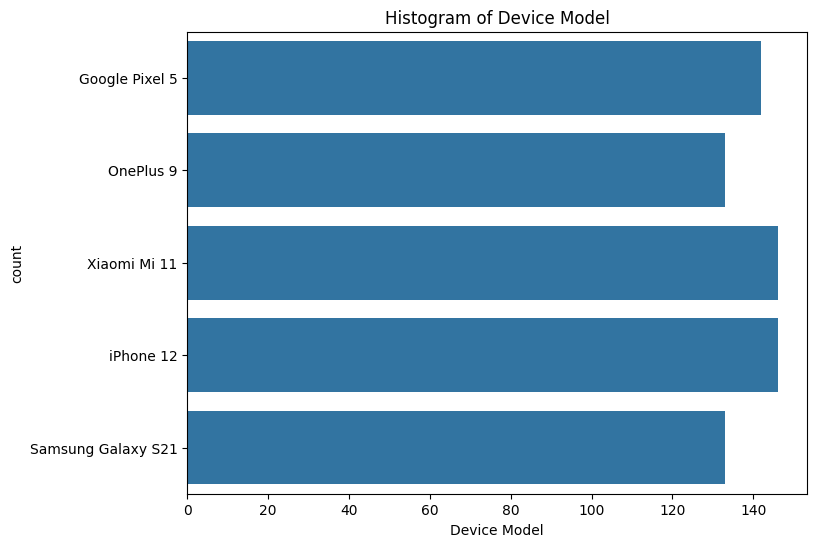

In [ ]:
#Histogram:'
plt.figure(figsize=(8, 6))
sns.countplot(df['Device Model'])
plt.title('Histogram of Device Model')
plt.xlabel('Device Model')
plt.ylabel('count')
plt.show()

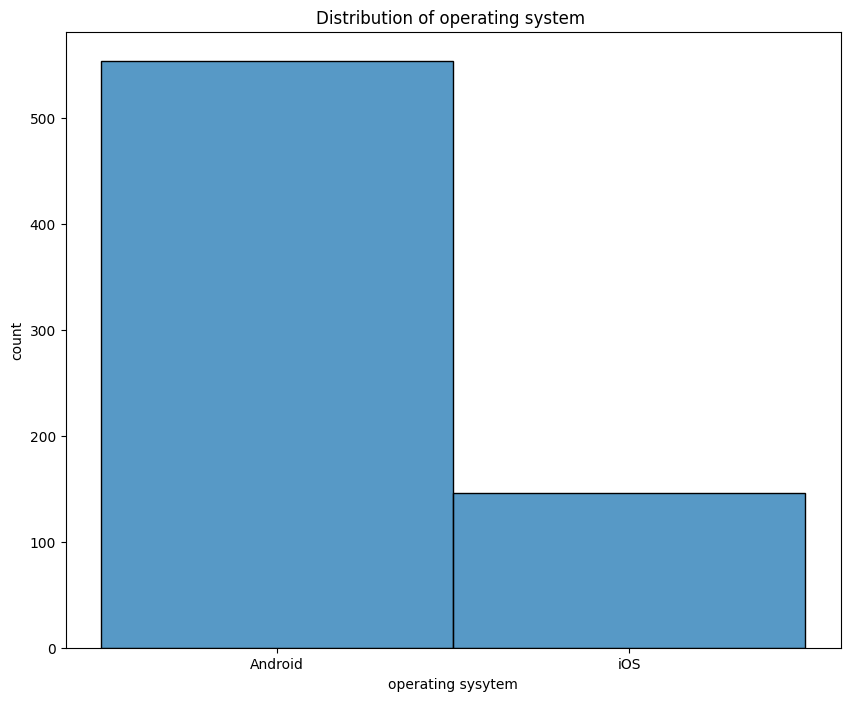

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Operating System'])
plt.title("Distribution of operating system ")
plt.xlabel("operating sysytem")
plt.ylabel("count")
plt.show()

<ipython-input-38-e590ced0f07d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Data Usage (MB/day)'],kde=True)


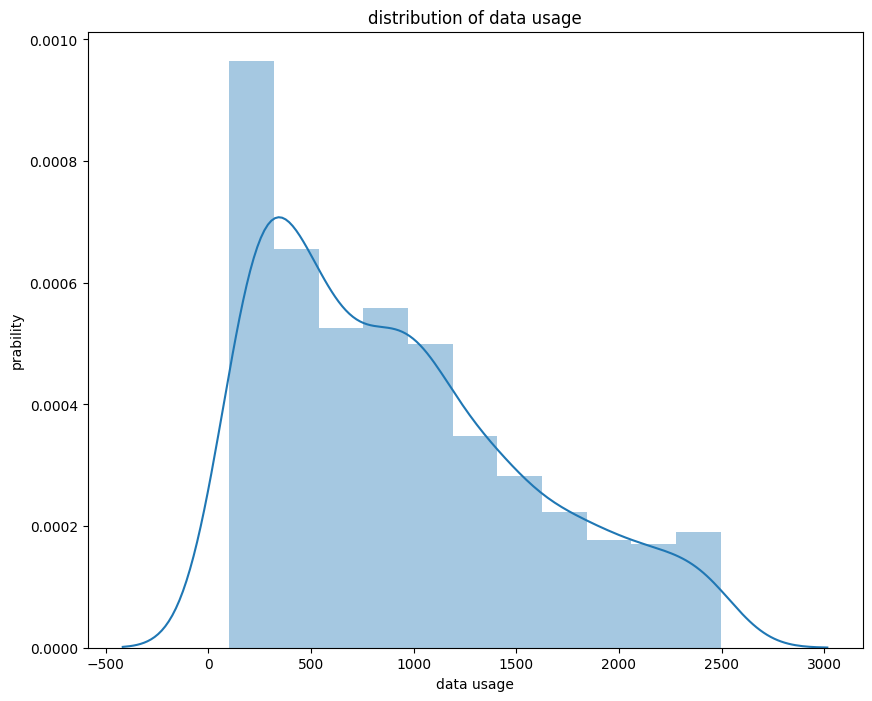

In [ ]:
#NO Of Data Uses per day
plt.figure(figsize=(10,8))
sns.distplot(df['Data Usage (MB/day)'],kde=True)
plt.title("distribution of data usage")
plt.xlabel("data usage")
plt.ylabel("prability")
plt.show()

In [ ]:
plt.figure(figsize=(70, 30))  # Adjust figure size as needed
for i,col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols),2,i+1)
    sns.distplot(df[col],kde=True)
    plt.title(f"destributiion of{col}")
    plt.xlabel(col)
    plt.ylabel("density")
plt.tight_layout(pad=3.0)
plt.show()


Check for Outliers

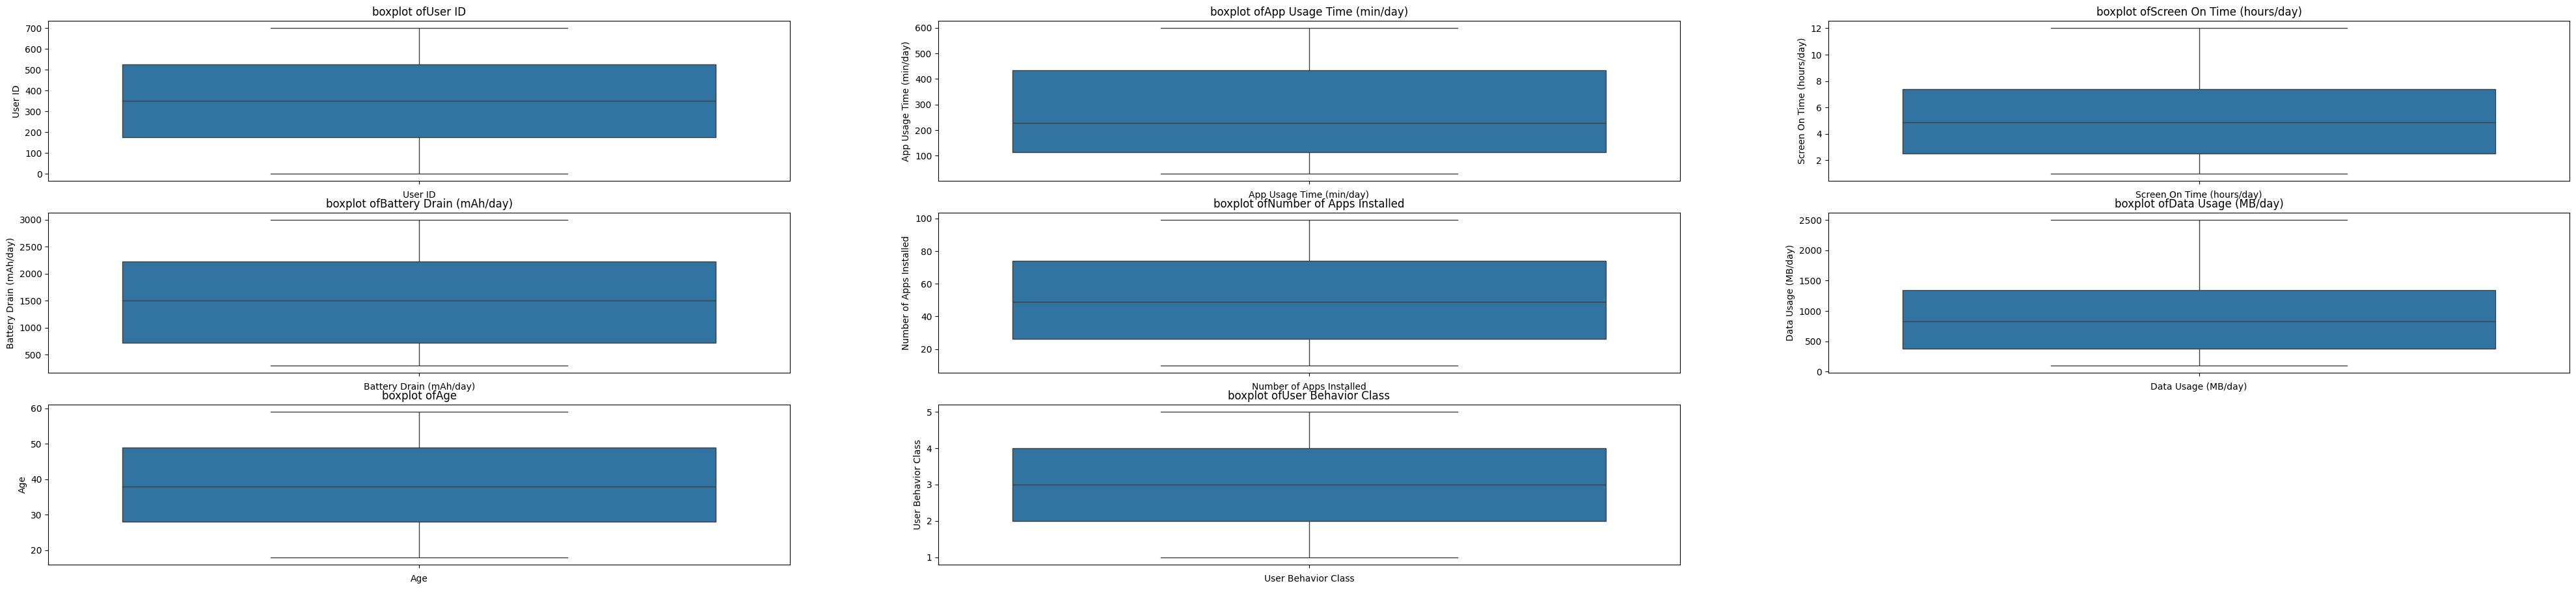

In [ ]:
# ploting box plot
plt.figure(figsize=(50, 30))
for i,col in enumerate(numerical_cols):

  plt.subplot(len(numerical_cols),3,i+1)
  sns.boxplot(df[col])
  plt.title(f"boxplot of{col}")
  plt.xlabel(col)

<Axes: xlabel='count', ylabel='Gender'>

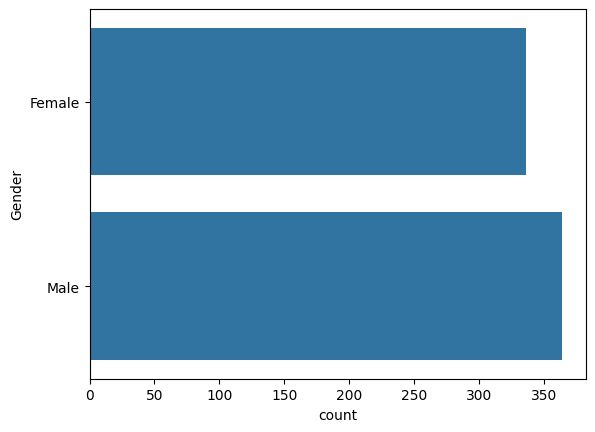

In [ ]:
sns.countplot(df['Gender'])

In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<Axes: xlabel='Data Usage (MB/day)'>

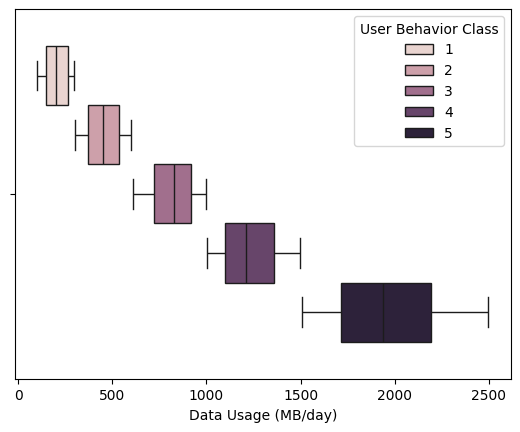

In [ ]:
sns.boxplot(x='Data Usage (MB/day)', hue='User Behavior Class', data=df)

<Axes: xlabel='Data Usage (MB/day)'>

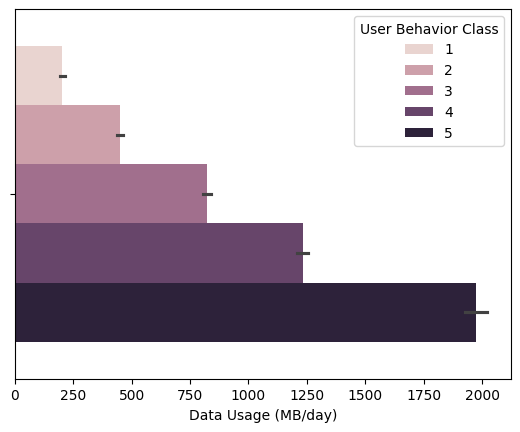

In [ ]:
     sns.barplot(x='Data Usage (MB/day)', hue='User Behavior Class', data=df)

<Axes: xlabel='User Behavior Class', ylabel='count'>

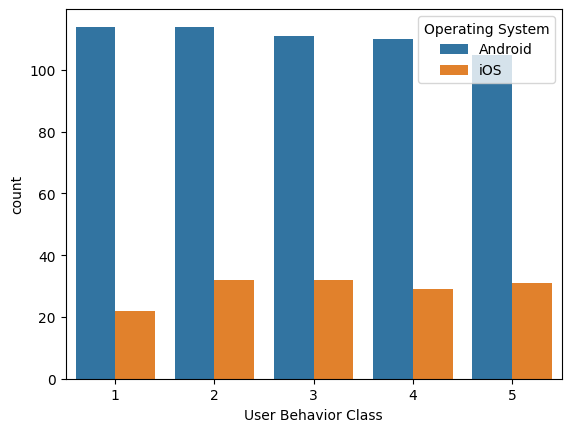

In [ ]:
sns.countplot(x='User Behavior Class', hue='Operating System', data=df)

<Axes: xlabel='User Behavior Class', ylabel='count'>

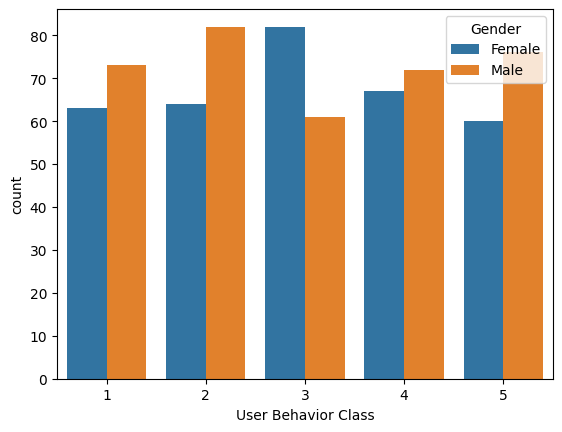

In [ ]:
sns.countplot(x='User Behavior Class', hue='Gender', data=df)

<ipython-input-18-c2912b724ad7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Device Model', y='App Usage Time (min/day)', data=df,palette='Set2', ci=None)
<ipython-input-18-c2912b724ad7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Device Model', y='App Usage Time (min/day)', data=df,palette='Set2', ci=None)


Text(0.5, 1.0, 'Average App Usage Time by Device Model')

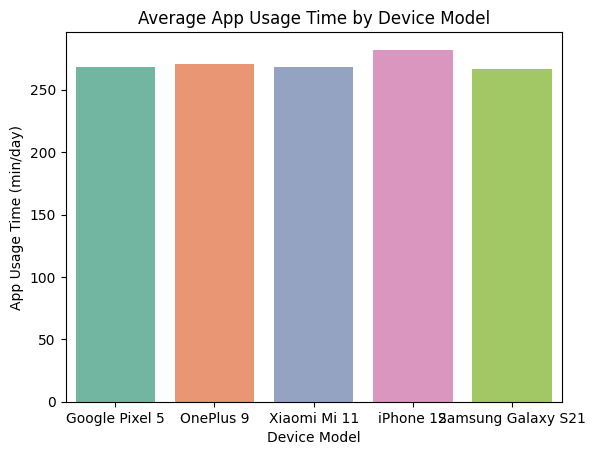

In [ ]:
sns.barplot(x='Device Model', y='App Usage Time (min/day)', data=df,palette='Set2', ci=None)
plt.title('Average App Usage Time by Device Model')


<ipython-input-14-d34b10b5d442>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df,palette='Set2', ci=None)
<ipython-input-14-d34b10b5d442>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df,palette='Set2', ci=None)


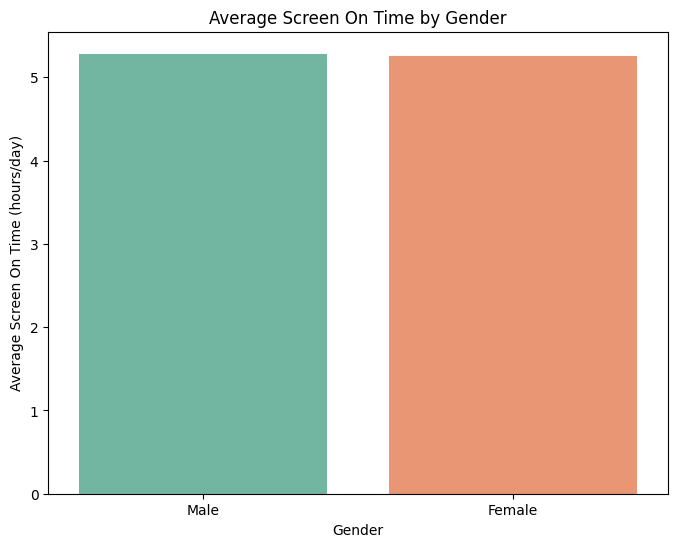

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df,palette='Set2', ci=None)
plt.title('Average Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Screen On Time (hours/day)')
plt.show()

<Axes: xlabel='App Usage Time (min/day)', ylabel='Screen On Time (hours/day)'>

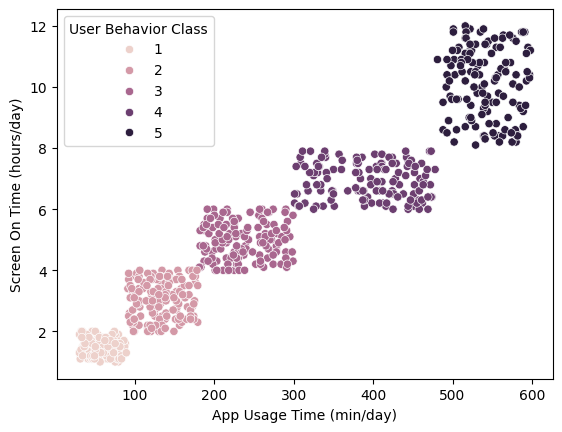

In [ ]:
# BIVARIATE ANALYSIS
sns.scatterplot(df,x='App Usage Time (min/day)',y='Screen On Time (hours/day)',hue='User Behavior Class')


<Axes: xlabel='Number of Apps Installed', ylabel='Screen On Time (hours/day)'>

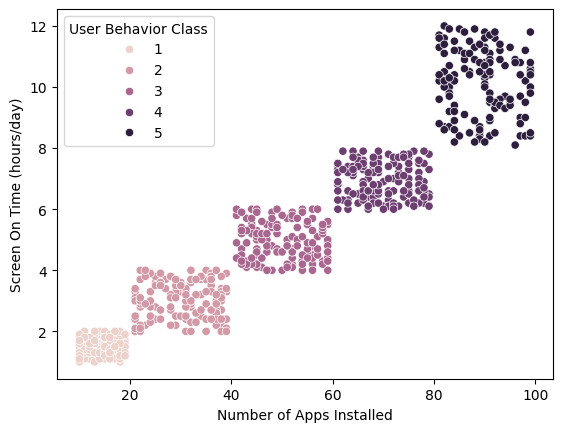

In [ ]:
sns.scatterplot(df,x='Number of Apps Installed',y='Screen On Time (hours/day)',hue='User Behavior Class')

<Axes: xlabel='Battery Drain (mAh/day)', ylabel='Data Usage (MB/day)'>

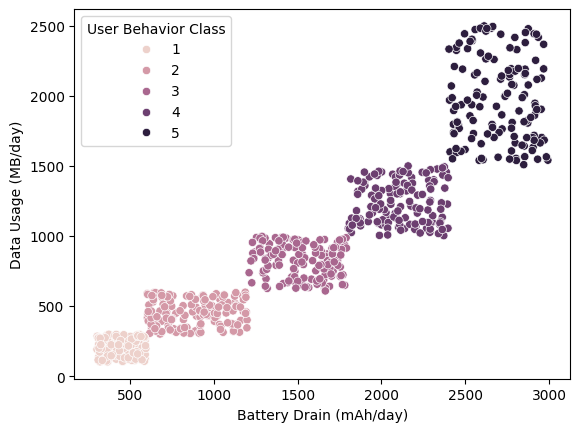

In [ ]:
sns.scatterplot(df,x='Battery Drain (mAh/day)',y='Data Usage (MB/day)',hue='User Behavior Class')

<Axes: xlabel='Gender', ylabel='count'>

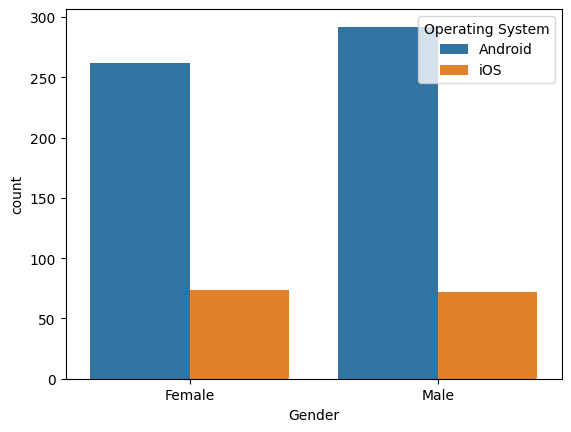

In [ ]:
sns.countplot(df,x='Gender',hue='Operating System')

In [ ]:
def find_outlier(data):
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers.tolist()


In [ ]:
for col in numerical_cols:
  outlier=find_outlier(df[col])
  if outlier:
    print(f"outliers in {col} are {outlier}")
  else:
    print(f"no outliers in {col}")


no outliers in User ID
no outliers in App Usage Time (min/day)
no outliers in Screen On Time (hours/day)
no outliers in Battery Drain (mAh/day)
no outliers in Number of Apps Installed
no outliers in Data Usage (MB/day)
no outliers in Age
no outliers in User Behavior Class


In [ ]:
#Correlation and Relationship Plots
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
correlation_matrix

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


#Mutivariate Analysis

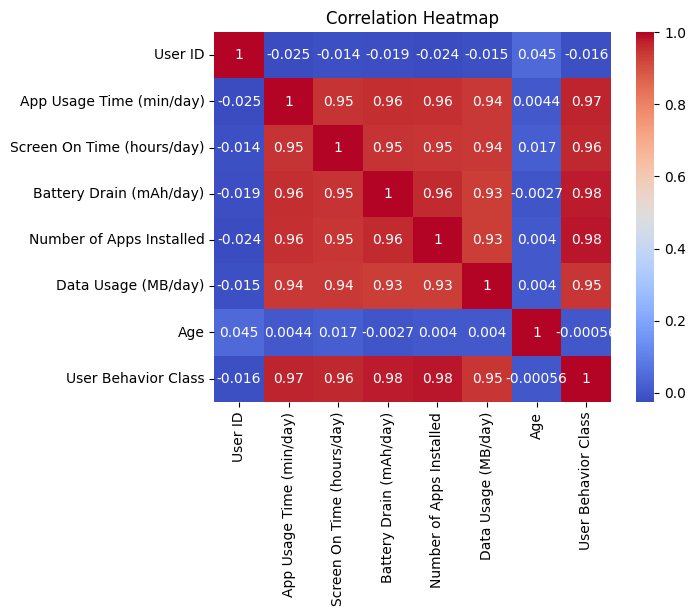

In [ ]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


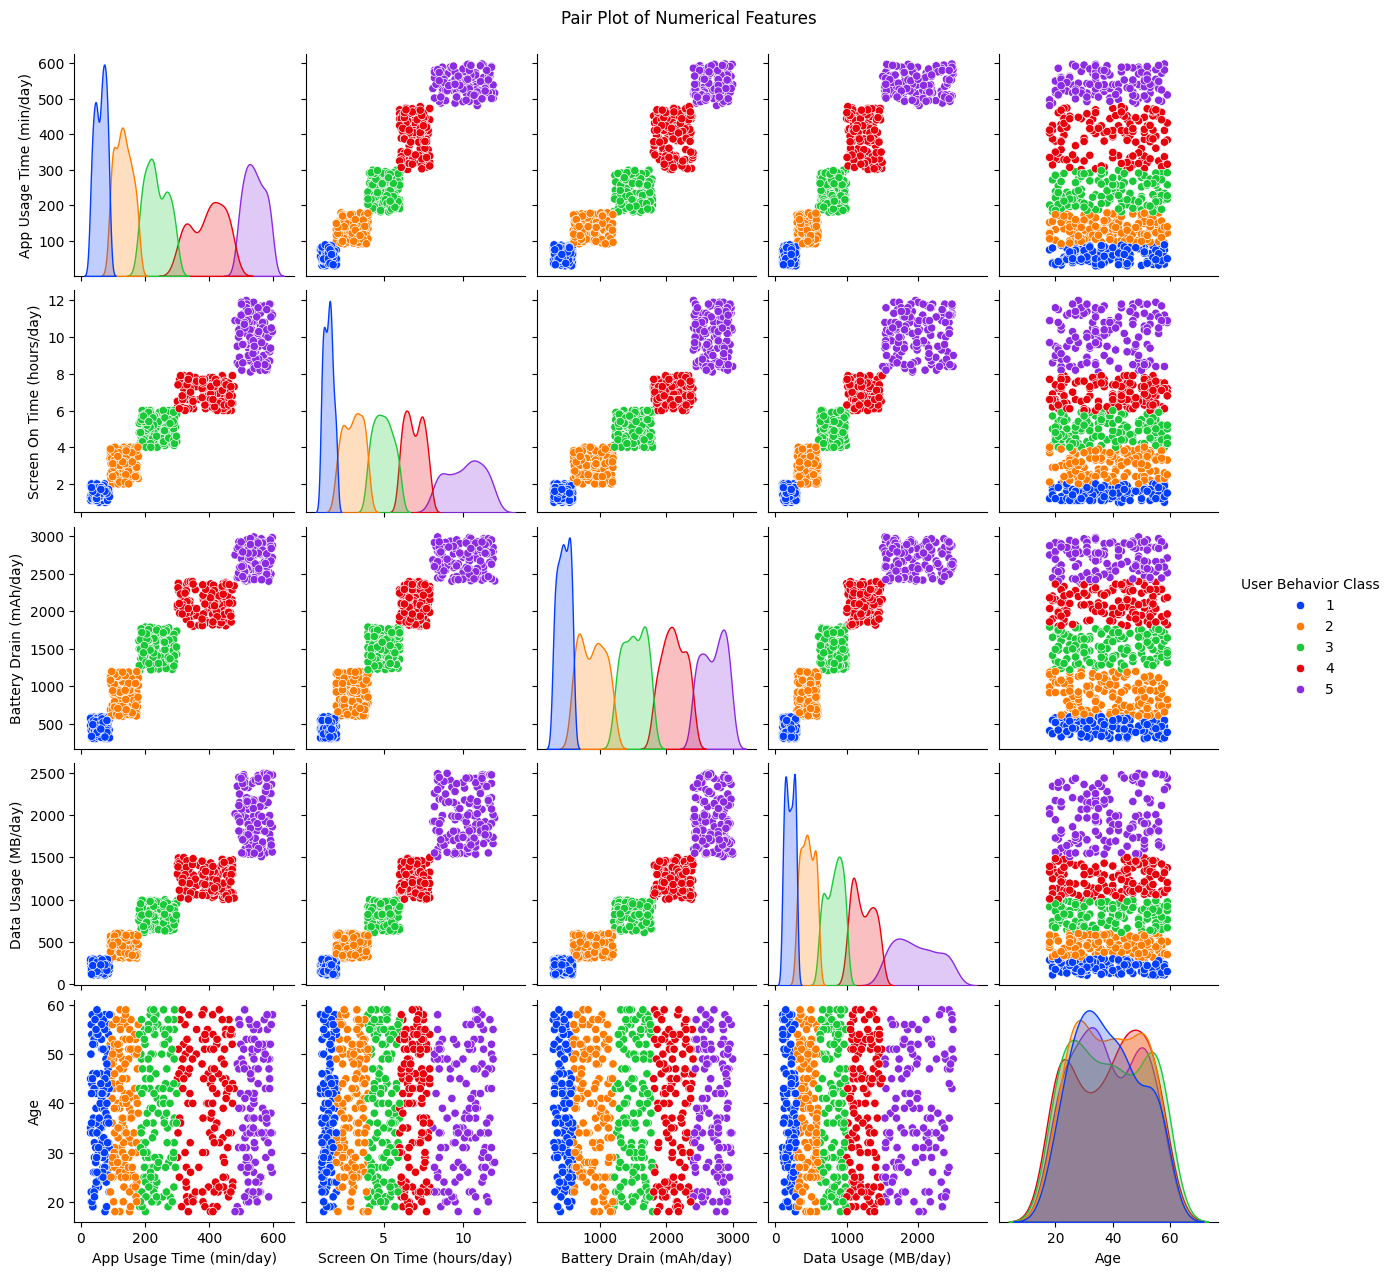

In [ ]:
sns.pairplot(df, vars=['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age'], hue='User Behavior Class', palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [ ]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

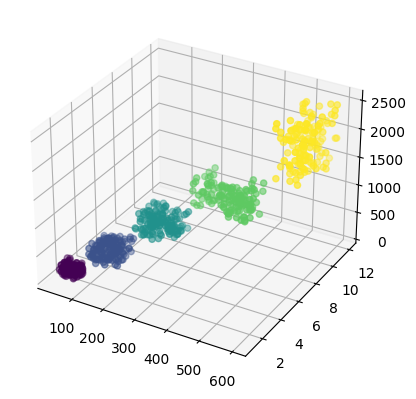

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['App Usage Time (min/day)'], df['Screen On Time (hours/day)'], df['Data Usage (MB/day)'], c=df['User Behavior Class']) # 'target_variable' for color-coding
plt.show()

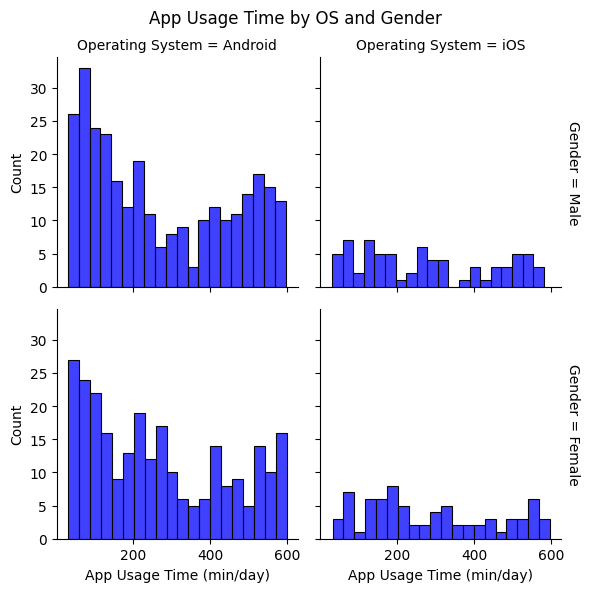

In [ ]:
g = sns.FacetGrid(df, col='Operating System', row='Gender', margin_titles=True, palette='Set2')
g.map(sns.histplot, 'App Usage Time (min/day)', bins=20, kde=False, color='blue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('App Usage Time by OS and Gender')
plt.show()

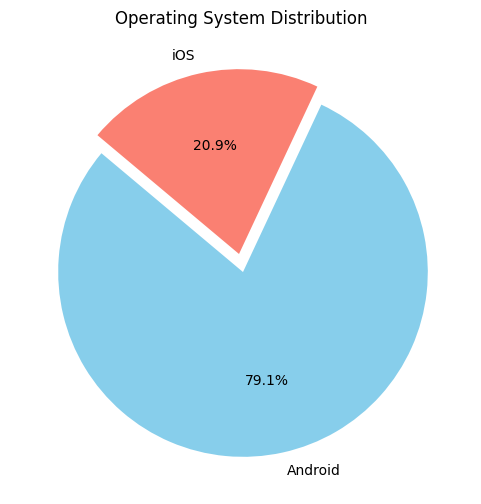

In [ ]:
plt.figure(figsize=(6, 6))
df['Operating System'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, explode=[0.05, 0.05])
plt.title('Operating System Distribution')
plt.ylabel('')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[['App Usage Time (min/day)', 'Screen On Time (hours/day)','Number of Apps Installed','Battery Drain (mAh/day)']])

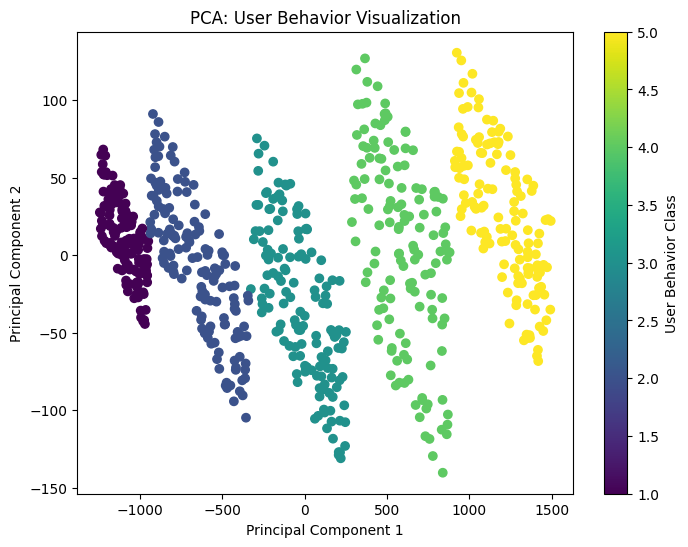

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['User Behavior Class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: User Behavior Visualization')
plt.colorbar(label='User Behavior Class')
plt.show()

In [ ]:
principal_components

array([[  364.70976091,    49.00131205],
       [ -190.91627911,    36.19369721],
       [ -772.21808748,    40.96168551],
       ...,
       [ -606.5784829 ,   -50.43819107],
       [-1114.462125  ,    17.52862243],
       [ -226.54464799,   -12.98156388]])

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", explained_variance_ratio.cumsum())

Explained Variance Ratio: [0.99634138 0.00365757]
Cumulative Explained Variance: [0.99634138 0.99999895]


In [ ]:
df[numerical_cols]

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
0,1,393,6.4,1872,67,1122,40,4
1,2,268,4.7,1331,42,944,47,3
2,3,154,4.0,761,32,322,42,2
3,4,239,4.8,1676,56,871,20,3
4,5,187,4.3,1367,58,988,31,3
...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2
696,697,316,6.8,1965,68,1201,59,4
697,698,99,3.1,942,22,457,50,2
698,699,62,1.7,431,13,224,44,1


In [ ]:
numerical_cols

['User ID',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age']

In [ ]:
cat_cols=df.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
df[cat_cols]

,Device Model,Operating System,Gender
0,Google Pixel 5,Android,Male
1,OnePlus 9,Android,Female
2,Xiaomi Mi 11,Android,Male
3,Google Pixel 5,Android,Male
4,iPhone 12,iOS,Female
...,...,...,...
695,iPhone 12,iOS,Male
696,Xiaomi Mi 11,Android,Male
697,Google Pixel 5,Android,Female
698,Samsung Galaxy S21,Android,Male


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['User Behavior Class'])
y=df['User Behavior Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Logistic Regression with PCA

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

numerical_cols = [col for col in numerical_cols if col != 'User Behavior Class']
cat_cols = [col for col in cat_cols if col != 'User Behavior Class']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)  # Apply PCA to test data as well

lg=LogisticRegression()
lg.fit(X_train_pca,y_train)
y_pred=lg.predict(X_test_pca)
print(accuracy_score(y_test,y_pred)
)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
 [[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 41]]


# Random Forest without PCA

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00        41

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Confusion Matrix:
 [[41  0  0  0  0]
 [ 0 44  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 41  0]
 [ 0  0  0  0 41]]
